In [1]:
#name entity recognition (NER)
#task to determine important named entities in text
#categories
#standford CoreNLP library java based intergrated into python via nltk, supports NER

In [1]:
import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
from collections import defaultdict
import itertools
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ashita Ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to C:\Users\Ashita
[nltk_data]     Ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
article = "The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.Millions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly."

sentences = sent_tokenize(article)
tokenized_sent = [word_tokenize(sent) for sent in sentences]
pos_sentences = [nltk.pos_tag(sent) for sent in tokenized_sent ]
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary= True)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk,"label") and chunk.label()=="NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


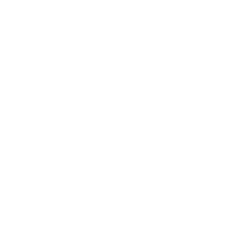

In [3]:
ner_categories = defaultdict(int)
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
labels = list(ner_categories.keys())
values = [ner_categories.get(v) for v in labels]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

In [4]:
#spacy similar to gensim, NLP pipelines for models and corpus
#opensourse
#displacy - visualization toool for parse trees
#spacy for NER, has different entity types + informal language corpora (tweets)

In [5]:
import spacy 

nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)
nlp.entity

doc= nlp(article)
for ent in doc.ents:
    print(ent.label_, ent.text)

C:\Users\Ashita Ashok\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: thinc.extra.search.Beam size changed, may indicate binary incompatibility. Expected 112 from C header, got 120 from PyObject
  return f(*args, **kwds)


ORG Uber
PERSON Uber
ORG unroll.me
ORG Apple
ORG Uber
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


In [6]:
#multilingual NER: polyglot
#uses word vectors for 130 languages
#can be used for transliteration

In [2]:
from polyglot.text import Text

# text="എന്റെ പേര് അഷിത, ഞാൻ 1994 ൽ കൊച്ചിയിലെ നേവൽ ബേസിൽ ജനിച്ചു"
# ptext = Text(text)
# ptext.entities

txt = Text(article)
for ent in txt.entities:
    print(ent)
    
print(type(ent))

entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]
print(entities)